In [76]:
import YahooFinance as ypp
import matplotlib 
import numpy as np
%matplotlib notebook
%matplotlib inline
import pandas as pd
import datetime 
import requests
from bs4 import BeautifulSoup as bs

yahoo = ypp.YahooFinance()


def get_historical(sym):
    pass

17.036252169557798
439.6538252429101


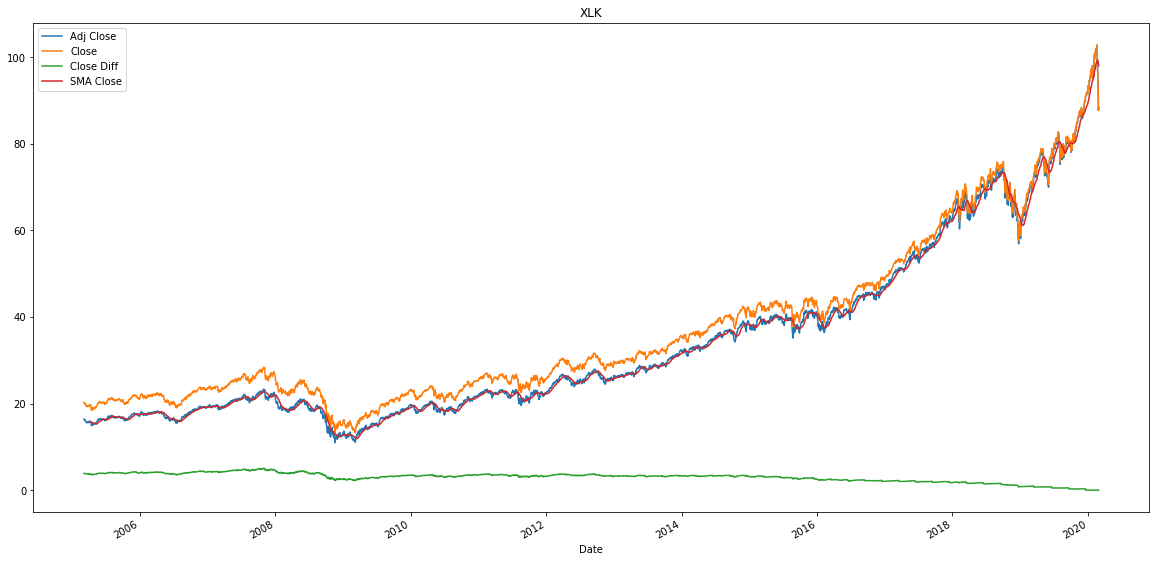

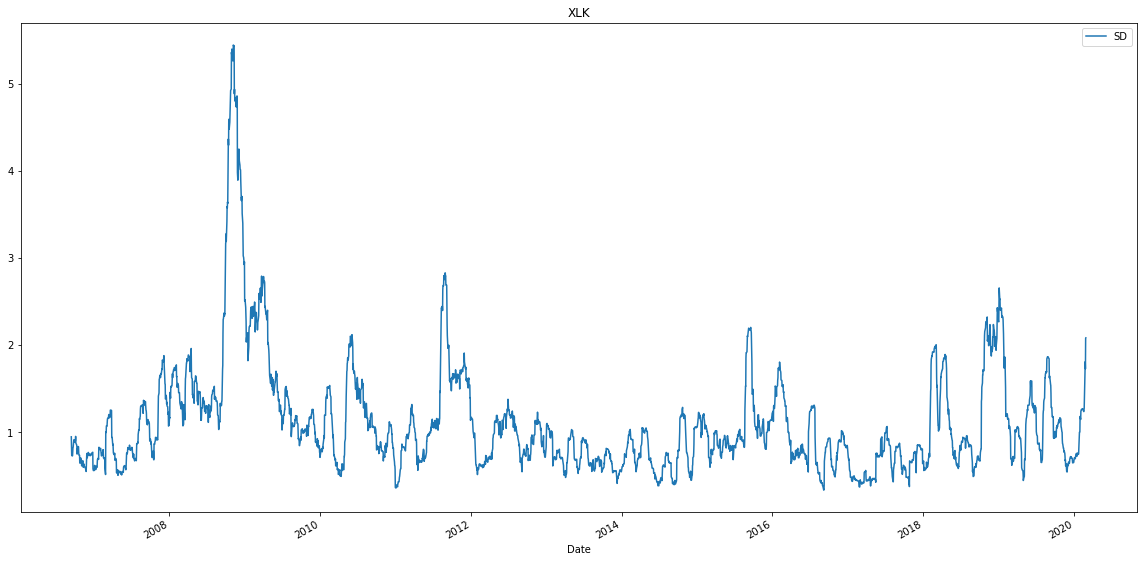

In [79]:
#df_brk = yahoo.get_historical("BRK-B", "1970/01/01") # VEA
dfx = yahoo.get_historical("XLK", "1970/01/01") # VEA
df = dfx

df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

df0 = df_brk
df0.Date = pd.to_datetime(df_brk.Date)
df0 = df0.set_index('Date')


df = df.loc[df.index > pd.to_datetime(datetime.datetime.now()) - pd.Timedelta(str(15*365) + " days")]
#df['Adj Close'] = df['Adj Close'] *3
df.loc[:, 'prev']= df["Adj Close"].shift().bfill()
df.loc[:, 'ret'] = 1 + (df['Adj Close'] - df.prev)/df.prev
df.loc[:, 'cumret'] = df.ret.cumprod()
df.loc[:, 'pct_ret'] =np.log(df['Adj Close'] /df.prev)


df.loc[:, 'pct_mean'] = df.pct_ret.rolling(window=21).mean()
df.loc[:,'SD'] =  np.sqrt(((df.pct_ret-df.pct_mean) * (df.pct_ret-df.pct_mean)).rolling(window=21).mean())*100
df.loc[:, 'SMA Close'] =df['Adj Close'].rolling(window=21).mean()
df.loc[:, 'Close Diff'] = df.Close - df['Adj Close']
df[['Adj Close', 'Close', 'Close Diff', 'SMA Close']].plot(figsize=(20,10), title=df.Symbol.unique()[0])
print(((df.ret.prod() ** (352/df.shape[0])) - 1)*100)
print(((df.ret.prod() ** (df.shape[0]/df.shape[0])) - 1)*100)
df[[ 'SD']].plot(figsize=(20,10), title=df.Symbol.unique()[0])

#df

#print("SD", df.pct_ret.sum()** 1/2)